In [1]:
import pandas as pd

In [3]:
total_move = pd.read_csv('./data/경기도 유동인구3231 total_move.csv')

In [4]:
total_move

,출발지코드,도착지코드,종합 유입인구
0,가평군,가평군,57201.137500
1,가평군,고양시,211.448333
2,가평군,과천시,15.983333
3,가평군,광명시,34.633333
4,가평군,광주시,100.250833
...,...,...,...
987,화성시,파주시,775.716667
988,화성시,평택시,13643.793333
989,화성시,포천시,453.536667
990,화성시,하남시,776.471667


1. '수원시', '고양시', '용인시', '화성시', '성남시', '부천시'
2. '남양주시', '안산시', '평택시', '안양시', '시흥시', '파주시'
3. '김포시', '의정부시', '광주시', '하남시', '광명시', '군포시'
4. '양주시', '오산시', '이천시', '안성시', '구리시', '의왕시'
5. '포천시', '양평군', '여주시', '동두천시', '과천시', '가평군', '연천군'

In [7]:
# 경기도 내 지역
total_move2 = total_move[total_move['출발지코드'] != '경기도외']
total_move2

,출발지코드,도착지코드,종합 유입인구
0,가평군,가평군,57201.137500
1,가평군,고양시,211.448333
2,가평군,과천시,15.983333
3,가평군,광명시,34.633333
4,가평군,광주시,100.250833
...,...,...,...
987,화성시,파주시,775.716667
988,화성시,평택시,13643.793333
989,화성시,포천시,453.536667
990,화성시,하남시,776.471667


In [10]:
# 경기도 지역 리스트
gyeonggi_cities = {
    '수원시': 1, '고양시': 1, '용인시': 1, '화성시': 1, '성남시': 1, '부천시': 1,
    '남양주시': 2, '안산시': 2, '평택시': 2, '안양시': 2, '시흥시': 2, '파주시': 2,
    '김포시': 3, '의정부시': 3, '광주시': 3, '하남시': 3, '광명시': 3, '군포시': 3,
    '양주시': 4, '오산시': 4, '이천시': 4, '안성시': 4, '구리시': 4, '의왕시': 4,
    '포천시': 5, '양평군': 5, '여주시': 5, '동두천시': 5, '과천시': 5, '가평군': 5, '연천군': 5
}

# '출발지단계' 컬럼 생성
total_move2['출발지단계'] = total_move2['출발지코드'].map(gyeonggi_cities)

# '도착지 단계' 컬럼 생성
total_move2['도착지단계'] = total_move2['도착지코드'].map(gyeonggi_cities)

# 결과 확인
total_move2

C:\Users\Jws\AppData\Local\Temp\ipykernel_22780\1538594232.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_move2['출발지단계'] = total_move2['출발지코드'].map(gyeonggi_cities)
C:\Users\Jws\AppData\Local\Temp\ipykernel_22780\1538594232.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_move2['도착지단계'] = total_move2['도착지코드'].map(gyeonggi_cities)


,출발지코드,도착지코드,종합 유입인구,출발지단계,도착지단계
0,가평군,가평군,57201.137500,5,5
1,가평군,고양시,211.448333,5,1
2,가평군,과천시,15.983333,5,5
3,가평군,광명시,34.633333,5,3
4,가평군,광주시,100.250833,5,3
...,...,...,...,...,...
987,화성시,파주시,775.716667,1,2
988,화성시,평택시,13643.793333,1,2
989,화성시,포천시,453.536667,1,5
990,화성시,하남시,776.471667,1,3


In [11]:
# 출발지단계와 도착지단계를 그룹화하여 평균 종합 유입인구를 계산
grouped_data = total_move2.groupby(['출발지단계', '도착지단계'])['종합 유입인구'].mean().reset_index()

# 결과를 표로 만들기
grouped_data.pivot_table(index='출발지단계', columns='도착지단계', values='종합 유입인구', fill_value=0)

도착지단계,1,2,3,4,5
출발지단계,,,,,
1,167227.715648,5790.163819,3460.212176,2700.093380,955.472302
2,6110.579606,92446.936736,2573.365602,2727.429861,1061.809802
3,3762.413148,2663.038264,52403.554167,1419.355463,892.257500
4,2624.279421,2981.919838,1251.869120,31797.279282,805.691746
5,355.014008,517.623790,499.302143,703.581270,13063.692976


In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import platform
if platform.system() == 'Darwin' : 
    plt.rc('font', family = 'AppleGothic')
else:
    plt.rc('font', family = 'Malgun Gothic')

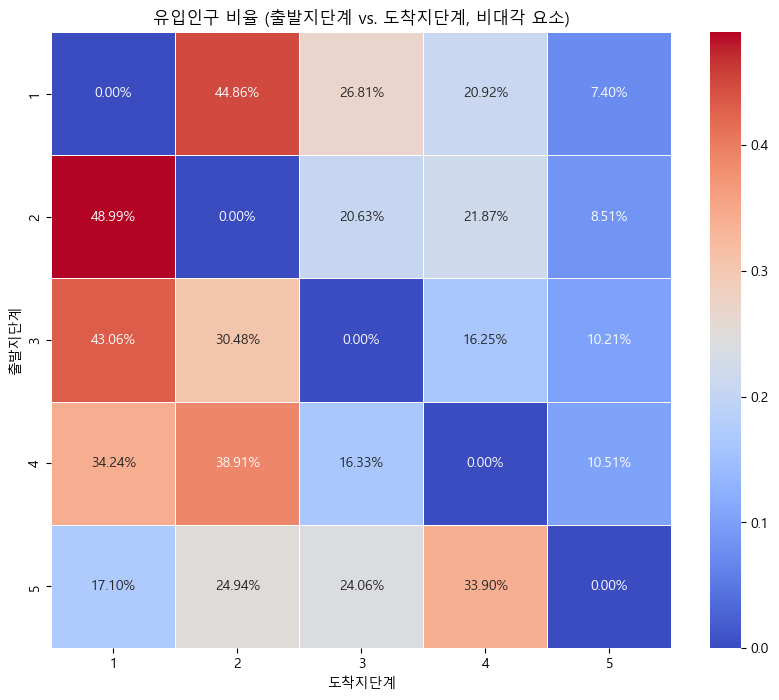

In [14]:
# 대각선(출발지단계와 도착지단계가 같은 경우) 제거
non_diagonal_data = grouped_data[grouped_data['출발지단계'] != grouped_data['도착지단계']]

# 피벗 테이블 생성
pivot_table = non_diagonal_data.pivot_table(index='출발지단계', columns='도착지단계', values='종합 유입인구', fill_value=0)

# 각 출발지 단계에서 모든 도착지 단계로의 유입인구 총합 계산
total_inflow_by_departure = pivot_table.sum(axis=1)

# 비율 계산을 위해 각 셀 값을 해당 출발지 단계의 총 유입인구로 나눔
ratio_table = pivot_table.div(total_inflow_by_departure, axis=0)

# 히트맵으로 비율 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(ratio_table, annot=True, fmt=".2%", cmap='coolwarm', linewidths=.5)
plt.title('유입인구 비율 (출발지단계 vs. 도착지단계, 비대각 요소)')
plt.xlabel('도착지단계')
plt.ylabel('출발지단계')
plt.show()
